<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_ComparaMetodosDeSolucao_FelipeGodoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [18]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

Cloning into 'MetodosNumericos2020_3'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 127 (delta 67), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (127/127), 171.26 KiB | 3.42 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3


In [19]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from SOR import SOR


/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/SOR.py:41: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: overflow encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/Jacobi.py:33: RuntimeWarning: overflow encountered in double_scalars
  xnew[i] = (f[i] - sum)/A[i,i]
/content/MetodosNumericos2020_3/J

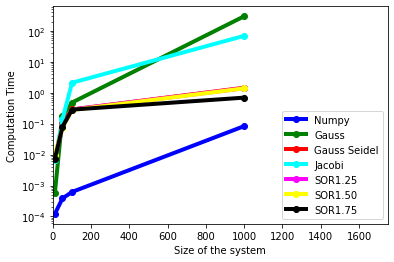

In [20]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_eliminacaodegauss = []
cpu_time_gaussseidel = []
cpu_time_jacobi = []
cpu_time_SOR125 = []
cpu_time_SOR150 = []
cpu_time_SOR175 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycodeeliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_eliminacaodegauss.append(time.clock()-t0)

  # mycodegaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_gaussseidel.append(time.clock()-t0)

  # mycodejacobi
  t0 = time.clock()
  x= np.random.rand(size)
  z = jacobi(A,f,x)
  cpu_time_jacobi.append(time.clock()-t0)

  # mycodesor1
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.25
  x = SOR(A,f,x0,omega)
  cpu_time_SOR125.append(time.clock()-t0)

  # mycodesor2
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.5
  x = SOR(A,f,x0,omega)
  cpu_time_SOR150.append(time.clock()-t0)

  # mycodesor3
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.75
  x = SOR(A,f,x0,omega)
  cpu_time_SOR175.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='blue',label='Numpy')
plt.semilogy(SIZE,cpu_time_eliminacaodegauss,'o-',linewidth=4, color='green',label='Gauss')
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='cyan',label='Jacobi')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='magenta',label='SOR1.25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR1.50')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR1.75')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1750])
plt.legend(loc=4)
plt.show()

In [21]:
print (cpu_time_numpy)
print(cpu_time_eliminacaodegauss)
print(cpu_time_gaussseidel)
print(cpu_time_jacobi)
print(cpu_time_SOR125)
print(cpu_time_SOR150)
print(cpu_time_SOR175)

[0.00012099999997872146, 0.0003839999999968313, 0.0006209999999953197, 0.0836529999999982]
[0.0005600000000072214, 0.17551299999999515, 0.4833900000000142, 298.949423]
[0.006514000000009901, 0.10663299999998799, 0.2890379999999766, 1.456055000000049]
[0.006537000000008675, 0.14013599999998405, 2.1125609999999995, 69.55327700000004]
[0.007568999999989501, 0.07926299999999742, 0.2868660000000034, 1.4112850000000208]
[0.009759999999999991, 0.07434000000000651, 0.2767599999999959, 1.391010999999935]
[0.00733500000001186, 0.0790800000000047, 0.2859070000000088, 0.697563999999943]


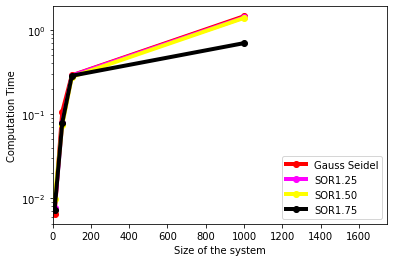

In [22]:
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='magenta',label='SOR1.25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR1.50')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR1.75')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1750])
plt.legend(loc=4)
plt.show()